### 0. 사용할 패키지 불러오기

In [1]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i+look_back, 0])
    return np.array(dataX), np.array(dataY)


class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
    
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

look_back = 40

Using TensorFlow backend.


### 1. 데이터 생성하기

In [2]:
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### 2. 모델 구성하기

In [3]:
model = Sequential()
model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 32)                   4352      
_________________________________________________________________
dropout_1 (Dropout)          (1, 32)                   0         
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


### 3. 모델 학습과정 설정하기

In [4]:
model.compile(loss='mean_squared_error', optimizer='adam')

### 4. 모델 학습시키기

In [ ]:
custom_hist = CustomHistory()
custom_hist.init()

epoch_num = 0
for i in range(200):
    epoch_num += 1
    print("iteration: " + str(epoch_num))
    model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, callbacks=[custom_hist], validation_data=(x_val, y_val), verbose=0)
    model.reset_states()

### 5. 학습과정 살펴보기

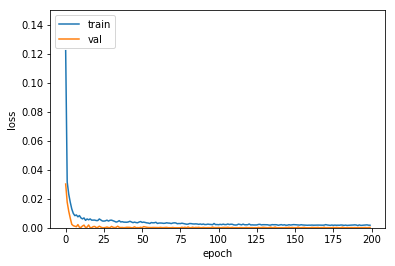

In [6]:
plt.plot(custom_hist.train_loss)
plt.plot(custom_hist.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYsAAAEKCAYAAADjDHn2AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3Xt4XNV97//3dy6632xZvl9kgwHbXAzIxpwEQsIpAVowKZcYSEp60tCclNOGtGnIk5akHPoc0v6atPmVNiGFloQkQCDpzz11QrgESFIutgEDtjGWjS/yVTfrLo008/39sbeMPMxIsmFLwv68nkePZvZee8939mzNV2utvdY2d0dERGQ4sfEOQEREJj4lCxERGZGShYiIjEjJQkRERqRkISIiI1KyEBGRESlZiIjIiJQsRERkREoWIiIyosR4B/BemTJlitfW1o53GCIi7yvr169vcveakcodN8mitraWdevWjXcYIiLvK2a2czTl1AwlIiIjUrIQEZERKVmIiMiIjps+i1z6+/tpaGigt7d3vEOJXFFREbNnzyaZTI53KCJyHDquk0VDQwPl5eXU1tZiZuMdTmTcnebmZhoaGpg/f/54hyMix6Hjuhmqt7eX6urq4zpRAJgZ1dXVJ0QNSkTGx3GdLIDjPlEMOlHep4iMj+M+WYiIyLunZBGxQ4cO8U//9E9Hvd3ll1/OoUOHIohIROToRZoszOxSM9tiZvVmdluO9Rea2UtmNmBm1+RYX2Fme8zsH6OMM0r5kkU6nR52uzVr1lBVVRVVWCIiRyWyZGFmceBu4DJgMXC9mS3OKrYL+BTwwzy7+d/AM1HFOBZuu+02tm3bxtKlS1m2bBkf/vCHueGGGzjjjDMAuOqqqzj33HNZsmQJ99xzz+HtamtraWpqYseOHSxatIjPfOYzLFmyhEsuuYSenp7xejsicoKK8tLZ5UC9u28HMLMHgZXApsEC7r4jXJfJ3tjMzgWmAT8H6t5tMH/1HxvZtLf93e7mCItnVvDVK5YMW+auu+7i9ddf55VXXuHpp5/mt3/7t3n99dcPX+J63333MXnyZHp6eli2bBlXX3011dXVR+xj69at/OhHP+K73/0u1113HY8++iif+MQn3tP3IiIynCiboWYBu4c8bwiXjcjMYsDfAV+MIK5xtXz58iPGQnzrW9/irLPOYsWKFezevZutW7e+Y5v58+ezdOlSAM4991x27NgxVuGKiADR1ixyXcvpo9z2c8Aad9893CWhZnYzcDPA3Llzh93hSDWAsVJaWnr48dNPP80TTzzBc889R0lJCRdddFHOsRKFhYWHH8fjcTVDiciYizJZNABzhjyfDewd5bbnAxeY2eeAMqDAzDrd/YhOcne/B7gHoK6ubrSJaEyVl5fT0dGRc11bWxuTJk2ipKSEN954g+eff36MoxMRGZ0ok8VaYKGZzQf2AKuAG0azobvfOPjYzD4F1GUniveL6upqPvCBD3D66adTXFzMtGnTDq+79NJL+fa3v82ZZ57JqaeeyooVK8YxUhGR/Mw9un/Izexy4O+BOHCfu/+1md0BrHP31Wa2DPgpMAnoBfa7+5KsfXyKIFncMtxr1dXVefbNjzZv3syiRYves/cz0Z1o71dE3j0zW+/uI15EFOlEgu6+BliTtez2IY/XEjRPDbePfwP+LYLwRERklDSCW0RERqRkISIiI1KyEBGRESlZiIjIiJQsRERkREoWE0xZWdl4hyAi8g5KFiIiMqJIx1kIfOlLX2LevHl87nOfA+BrX/saZsazzz5La2sr/f393HnnnaxcuXKcIxURye/ESRY/uw32v/be7nP6GXDZXcMWWbVqFZ///OcPJ4uHH36Yn//859x6661UVFTQ1NTEihUruPLKK3UfbRGZsE6cZDFOzj77bA4ePMjevXtpbGxk0qRJzJgxg1tvvZVnn32WWCzGnj17OHDgANOnTx/vcEVEcjpxksUINYAoXXPNNTzyyCPs37+fVatW8YMf/IDGxkbWr19PMpmktrY259TkIiITxYmTLMbRqlWr+MxnPkNTUxPPPPMMDz/8MFOnTiWZTPLLX/6SnTt3jneIIiLDUrIYA0uWLKGjo4NZs2YxY8YMbrzxRq644grq6upYunQpp5122niHKCIyLCWLMfLaa293rk+ZMoXnnnsuZ7nOzs6xCklEZNQ0zkJEREakZCEiIiM67pNFlHcCnEhOlPcpIuPjuE4WRUVFNDc3H/dfpO5Oc3MzRUVF4x2KiBynjusO7tmzZ9PQ0EBjY+N4hxK5oqIiZs8e9g61IiLH7LhOFslkkvnz5w9bJpNxuvvTFMRjFCSO64qWiMgxi/Tb0cwuNbMtZlZvZrflWH+hmb1kZgNmds2Q5UvN7Dkz22hmr5rZx6OKsaU7xelffYwH1+6K6iVERN73IksWZhYH7gYuAxYD15vZ4qxiu4BPAT/MWt4N/J67LwEuBf7ezKqiiDMeTt6Xzhzf/RoiIu9GlM1Qy4F6d98OYGYPAiuBTYMF3H1HuC4zdEN3f3PI471mdhCoAQ6910HGYkoWIiIjibIZahawe8jzhnDZUTGz5UABsO09iusI8TBZZI7zK6ZERN6NKJNFrpszHNU3spnNAL4P/L67Z3Ksv9nM1pnZumO94untZqhj2lxE5IQQZbJoAOYMeT4b2Dvajc2sAvhP4C/c/flcZdz9Hnevc/e6mpqaYwoyFh4B1SxERPKLMlmsBRaa2XwzKwBWAatHs2FY/qfA99z9xxHGqA5uEZFRiCxZuPsAcAvwGLAZeNjdN5rZHWZ2JYCZLTOzBuBa4DtmtjHc/DrgQuBTZvZK+LM0ijjVZyEiMrJIB+W5+xpgTday24c8XkvQPJW93QPAA1HGNmjwvtcZ1SxERPLSkGWC2kVaNQsRkbyULAj6LXQ1lIhIfkoWBFdEqc9CRCQ/JQsGaxZKFiIi+ShZEEz5oWQhIpKfkgVBB7eaoURE8lOyQM1QIiIjUbIgaIZSzUJEJD8lC1SzEBEZiZIF4aA8jbMQEclLyQKNsxARGYmSBWqGEhEZiZIF4TgL1SxERPJSsiCoWWjWWRGR/JQsGOzgVrIQEclHyQKImcZZiIgMR8kC1SxEREaiZMFgB/d4RyEiMnEpWQBx021VRUSGo2SBmqFEREYSabIws0vNbIuZ1ZvZbTnWX2hmL5nZgJldk7XuJjPbGv7cFGWcMdM4CxGR4USWLMwsDtwNXAYsBq43s8VZxXYBnwJ+mLXtZOCrwHnAcuCrZjYpqljjMY2zEBEZTpQ1i+VAvbtvd/cU8CCwcmgBd9/h7q8C2dP4fRR43N1b3L0VeBy4NKpA4xrBLSIyrCiTxSxg95DnDeGyqLc9ajGN4BYRGVaUycJyLBvtN/KotjWzm81snZmta2xsPKrghlLNQkRkeFEmiwZgzpDns4G97+W27n6Pu9e5e11NTc0xBxoz3c9CRGQ4USaLtcBCM5tvZgXAKmD1KLd9DLjEzCaFHduXhMsiEY9pnIWIyHAiSxbuPgDcQvAlvxl42N03mtkdZnYlgJktM7MG4FrgO2a2Mdy2BfjfBAlnLXBHuCwSaoYSERleIsqdu/saYE3WstuHPF5L0MSUa9v7gPuijG+QOrhFRIanEdyoZiEiMhIlC3RbVRGRkShZEMw6q2YoEZH8lCwIaxZqhhIRyUvJgvB+FhpnISKSl5IF4TgL1SxERPJSskAd3CIiI1GyQB3cIiIjUbJAHdwiIiNRskC3VRURGYmSBWEzlGoWIiJ5KVmgDm4RkZEoWTBYsxjvKEREJi4lC4KaBeieFiIi+ShZEAzKA3RFlIhIHkoWBM1QgPotRETyULJgSDOUahYiIjkpWRCMswDVLERE8lGyILitKkBGM8+KiOSkZMGQmoWaoUREcoo0WZjZpWa2xczqzey2HOsLzeyhcP0LZlYbLk+a2f1m9pqZbTazL0cZpzq4RUSGF1myMLM4cDdwGbAYuN7MFmcV+zTQ6u4nA98Evh4uvxYodPczgHOBPxxMJFFQB7eIyPCirFksB+rdfbu7p4AHgZVZZVYC94ePHwEuNjMDHCg1swRQDKSA9qgCPTzOQjULEZGcokwWs4DdQ543hMtylnH3AaANqCZIHF3APmAX8P+4e0tUgQ52cCtZiIjkNqpkYWZ/YmYVFrjXzF4ys0tG2izHsuxv43xllgNpYCYwH/hTM1uQI66bzWydma1rbGwcxTvJbbCDW81QIiK5jbZm8T/cvR24BKgBfh+4a4RtGoA5Q57PBvbmKxM2OVUCLcANwM/dvd/dDwK/AeqyX8Dd73H3Onevq6mpGeVbeSeNsxARGd5ok8VgDeBy4F/dfQO5awVDrQUWmtl8MysAVgGrs8qsBm4KH18DPOXuTtD09JGwJlMKrADeGGWsRy2mDm4RkWGNNlmsN7NfECSLx8ysHBh2CFvYB3EL8BiwGXjY3Tea2R1mdmVY7F6g2szqgS8Ag5fX3g2UAa8TJJ1/dfdXj+J9HZW3axZRvYKIyPtbYpTlPg0sBba7e7eZTSZoihqWu68B1mQtu33I416Cy2Szt+vMtTwq6uAWERneaGsW5wNb3P2QmX0C+AuCK5eOC2HFQs1QIiJ5jDZZ/DPQbWZnAX8O7AS+F1lUY0wd3CIiwxttshgIO55XAv/g7v8AlEcX1tiKaW4oEZFhjbbPoiOcn+mTwAXhVB7J6MIaW7qtqojI8EZbs/g40Ecw3mI/wcjrv40sqjGmZigRkeGNKlmECeIHQKWZ/Q7Q6+7HTZ/F4auh1AwlIpLTaKf7uA54keBy1uuAF8zsmigDG0uHp/vQOAsRkZxG22fxFWBZOPUGZlYDPEEw4d/73uFZZ1WzEBHJabR9FrHBRBFqPoptJ7yYOrhFRIY12prFz83sMeBH4fOPkzUy+/1MHdwiIsMbVbJw9y+a2dXABwgmELzH3X8aaWRjSB3cIiLDG23NAnd/FHg0wljGzdsd3EoWIiK5DJsszKyDd96wCILahbt7RSRRjbG4RnCLiAxr2GTh7sfNlB7D0ayzIiLDO26uaHo3dFtVEZHhKVnw9txQuvmRiEhuShZALDwK6uAWEclNyQJ1cIuIjETJgqHNUEoWIiK5KFnw9s2P1MEtIpJbpMnCzC41sy1mVm9mt+VYX2hmD4XrXzCz2iHrzjSz58xso5m9ZmZFUcWpmoWIyPAiSxbh3fTuBi4DFgPXm9nirGKfBlrd/WTgm8DXw20TwAPAZ919CXAR0B9VrDHNDSUiMqwoaxbLgXp33+7uKeBBgnt4D7USuD98/AhwsZkZcAnwqrtvAHD3ZndPRxWoxlmIiAwvymQxC9g95HlDuCxnGXcfANqAauAUwM3sMTN7ycz+PMI4Nc5CRGQEo55I8BhYjmXZ/7rnK5MAPggsA7qBJ81svbs/ecTGZjcDNwPMnTv3mAM9PM5CNQsRkZyirFk0AHOGPJ8N7M1XJuynqARawuXPuHuTu3cT3DvjnOwXcPd73L3O3etqamqOOdC4bn4kIjKsKJPFWmChmc03swJgFbA6q8xq4Kbw8TXAU+7uwGPAmWZWEiaRDwGbogpUg/JERIYXWTOUuw+Y2S0EX/xx4D5332hmdwDr3H01cC/wfTOrJ6hRrAq3bTWzbxAkHAfWuPt/RhWrmWGmmoWISD5R9lng7mvIuv2qu98+5HEvcG2ebR8guHx2TMTNVLMQEclDI7hDsZjpaigRkTyULEJxM10NJSKSh5JFKB4zjeAWEclDySIUM033ISKSj5JFKB5TM5SISD5KFiE1Q4mI5KdkEYqpg1tEJC8li5BqFiIi+SlZhGKmcRYiIvkoWYTUwS0ikp+SRUjNUCIi+SlZhGKmWWdFRPJRsgjFY6ZZZ0VE8lCyCAUd3EoWIiK5KFmE1MEtIpKfkkVIHdwiIvkpWYRiZqSVK0REclKyCKmDW0QkPyWLUFwd3CIieSlZhGIxjbMQEckn0mRhZpea2RYzqzez23KsLzSzh8L1L5hZbdb6uWbWaWZ/FmWcoGYoEZHhRJYszCwO3A1cBiwGrjezxVnFPg20uvvJwDeBr2et/ybws6hiHCro4FayEBHJJcqaxXKg3t23u3sKeBBYmVVmJXB/+PgR4GIzMwAzuwrYDmyMMMbDVLMQEckvymQxC9g95HlDuCxnGXcfANqAajMrBb4E/FWE8R0hrpqFiEheUSYLy7Es+9s4X5m/Ar7p7p3DvoDZzWa2zszWNTY2HmOYgVhM97MQEcknEeG+G4A5Q57PBvbmKdNgZgmgEmgBzgOuMbO/AaqAjJn1uvs/Dt3Y3e8B7gGoq6t7V9WCuKkZSkQknyiTxVpgoZnNB/YAq4AbssqsBm4CngOuAZ5ydwcuGCxgZl8DOrMTxXstHlMzlIhIPpElC3cfMLNbgMeAOHCfu280szuAde6+GrgX+L6Z1RPUKFZFFc9IYurgFhHJK8qaBe6+BliTtez2IY97gWtH2MfXIgkuS1w3PxIRyUsjuEMxzTorIpKXkkUopg5uEZG8lCxCGmchIpKfkkVI4yxERPJTsgjFY+i2qiIieShZhHQ/CxGR/JQsQhpnISKSn5JFqKIoSWdqgNSAOi5ERLIpWXQ1w/c/xrLUC7jDvrae8Y5IRGTCUbJIFMK2p5iTDmZT392iZCEikk3JoqAUEsVMph2AhtbucQ5IRGTiUbIwg9IplA60Eo8ZDa2qWYiIZFOyACidQqy7mRmVRexWzUJE5B2ULABKpkBXI3MmlahmISKSg5IFQGkNdDcze1Kx+ixERHJQsgAorYauRmZXFXOgvY/e/vR4RyQiMqEoWUBQsxjoZV5FMIJ77yE1RYmIDKVkAUGfBTC/OEgSu9VvISJyBCULCGoWwMxkF6CxFiIi2ZQsIOizACbTRlEyRv3BznEOSERkYok0WZjZpWa2xczqzey2HOsLzeyhcP0LZlYbLv8tM1tvZq+Fvz8SZZyDNYt4TzOnTa9g8772SF9OROT9JrJkYWZx4G7gMmAxcL2ZLc4q9mmg1d1PBr4JfD1c3gRc4e5nADcB348qTuBwnwVdjSyeWcGmve24boQkInJYlDWL5UC9u2939xTwILAyq8xK4P7w8SPAxWZm7v6yu+8Nl28EisysMLJIC0ogWQrdzSyeUUF774AG54mIDBFlspgF7B7yvCFclrOMuw8AbUB1VpmrgZfdvS+iOAOl1dDVxJKZFQBsUlOUiMhhUSYLy7Esu21n2DJmtoSgaeoPc76A2c1mts7M1jU2Nh5zoMDhKT9Om15BzGDTXiULEZFBUSaLBmDOkOezgb35yphZAqgEWsLns4GfAr/n7ttyvYC73+Pude5eV1NT8+6iLa2B7iaKC+LMn1LKRiULEZHDokwWa4GFZjbfzAqAVcDqrDKrCTqwAa4BnnJ3N7Mq4D+BL7v7byKM8W2lU6CrCYAlMyt1RZSIyBCRJYuwD+IW4DFgM/Cwu280szvM7Mqw2L1AtZnVA18ABi+vvQU4GfhLM3sl/JkaVawAlM+Ajv0wkOL0WRXsOdRDU2e03SQiIu8XiSh37u5rgDVZy24f8rgXuDbHdncCd0YZ2ztMXQSehuZ6zpk7HYCXdrZyyZLpYxqGiMhEpBHcg2pOC34f3MTpsypJxo31u1rHNyYRkQlCyWLQlIVgcTi4maJknNNnVfLSTiULERFQsnhbohCqT4bGNwA4d+4kNjS0kRrIjHNgIiLjT8liqKmnwcFNAJw7bxKpgYwG54mIoGRxpKmLoeUtSHVzzrxJAKzb0TLOQYmIjD8li6GmLgIcmrYwraKIk6eW8fimA+MdlYjIuFOyGGpqOCnuwaDf4oozZ/Lijhb2t/WOY1AiIuNPyWKoSfMhUQz7NgDwO2fNwB3+76vZs5SIiJxYlCyGiidg1jnQsBaAk2rKWDKzgv94dd84ByYiMr6ULLLNroP9r8JAMNXHVUtnsWH3IZ55813Oaisi8j6mZJFt9jJIp2DfqwB88vx5LJxaxhd/vIFvPbmVP7h/LY0dfbg7zZo7SkROEEoW2WbVBb/DpqiiZJxvfnwprd0pvvH4mzy9pZHPPrCeWx96hbq/foJfbjk4jsGKiIyNSCcSfF+qmAGVcw4nC4DTZ1Xy8B+eT2lhgjcPdHDLD19m/c5WppQV8JWfvMZjt15IeVFyHIMWEYmWkkUus+ugYd0Ri86eGwzSO2VaOemMM6mkgLKiBFf/839x60MbuO2yU7n3128xubSAL370tPGIWkQkMkoWucw5Dzb+FNoaoHL2O1avXPr2rcS/cvki7vrZGzyx+e3Be8tqJ/PyrkPsbO7iDy5YwCPrGzjY0cudV53B5NKCnC/5yzcO8sMXd/GF3zqFRTMq3vv3JCLyLph79m2x35/q6up83bp1IxccjX0b4DsXwsfugbM+PmLxLfs7eHDtLq4+ZzZ//ODLNLT0kEpnSMaN/rQTM0jEYtSUF3L+SdUMpDMMZJzTZ1WyYkE1u1q6+bOHNxze5n99ZCH/86KTSMaDLqVD3Sl+vK6BqpIkV58zm6feOMi6na30DaT50Ck1XLCwhnjsyNuZuzv9aacgoW4pEcnPzNa7e92I5ZQscsik4W/mw+KVcOX/e1SbvvhWC5/61xf5nx86ieuWzeHfX97DBQtr6E9nuO0nr9HWnSKZiOEOu1q6D2+3aEYF/3TjOXzz8TdZvWEvC6aUcsq0clq6Ury2p42e/jQAU8oKaersIxk34jGjtz/DzMoirjl3Np9YMY+pFUVs3NvGX/776+xo7uafbzyH5fMnk844ifg7E0ffQJonNh2kojjBB0+egpm9o8wgd6ehtYeZVcXvSE4i8v6kZPFu/XAVNL0Jf/zSUW86kM7k/GLOtudQDxv3tBEzY8VJ1ZQVBq2Cj23cz7/9ZgdNnX1UFCdZMrOCVcvmsnlfOw+v280VZ81k1bI5pN15YtNBHlq3m19tbSQZj1FbXcKbBzqpLi2gvCjBnkM9FCfj9PZnWDZ/EnMnl1CYiFOYjNHQ2sPz25pp7koBsHBqGX9wwXxKChK8+FYLZ8yu5Lz5kylOxnng+Z08+tIe9hzqYcnMCq5aOottjZ3MmVzCigXVnDm78nBNCCCdcfYe6mFGZRGJeIzGjj5+U9/EyVPLOH1W5VEfUxGJhpLFu/Vf/wi/+Ap84Y3gCqkJbkdTF995dhu7Wrr50Ck1XFc3B8P421+8gTsUJuL817YmmjpT9PWn6R1IM62iiKVzqriubg5NnX1891dvsTmckr0gEXvHvTwuOrWGZbWTeeD5nexr66WyOElbTz8Axck4tVNKWTCllBULJvPg2t1s3NtOQTxGPGaHa0aJmPHZD53EoZ4U+w710p9xSpJxasoLmVddQncqzaa97azb2UpNeSG11SWUFSY4a04VVSVJHt90gC37O2jtTjGppIAPnzaVG5bPpbU7RcaDJPXSzlaScWPp3EksmlFOYSJ++D24O9saO0lnYEpZAdVlhe/5Z9HalSLtzpQI9i3yXlOyeLf2vgz3XAS/+y9wZtZtwvt7IZ6EWDznpu9X7s66na1kMk5d7WTe2N/Oxr3tNHb08dEl0zh5ajkAvf1p2nr6mVpeSEtXihffauGFt1rY3dLNxr3t7G/vZWp5IZ+5YAFNXX2k005NeSF1tZP59jPbeHzTAUoLguSSiMfoSQ2w71AvHX0DAMyqKmb5/Mm0dKXYc6iHQ90pmjqD2s+UsgLOml3F5NICDnT08autjQx3ChfEYyyaWcGSmcFFA89va2Z7U9fh9VPKCqkpLyQRM9p6+ikpiDOjsogzZlexv62H5s4U559UzcGOPna3dHPxomnUVpdwsKOPl3e1YmacVFNKZXGSqRVFtPf084WHN5AayPDVKxazaEYFibgxuaSATfvaaevpZ8GUMl7Z3cq+tl7OP6maaRVFvNXUxZrX9jG1vJBz501iW2MXff1pppQX8tEl05lWUXQ45pd3tR5uqjx33mTmVpfw7y/vob23n989ezbTK4twd9p6+nng+Z0caO/jsxedxKyq4pzHqLUrxbqdrbR2pZhbXcLy2skMZJye/jSJmJGIG8lYjFhW02N/OkNbTz+VxUnSGSfjTnEyfkRT5kA6Q1cqTWVx7kvLM5ngwxvc90A6Q2NnH8XJOBVFyXe85uB5Olxz6bvV1tNPWWHihGlqnRDJwswuBf4BiAP/4u53Za0vBL4HnAs0Ax939x3hui8DnwbSwB+7+2PDvdZ7niwyafhGOAvtJx6B6WcEj3tagyQy7XRY9YO3yw+k4KX7oXgSnHFNsKyrCdb8GVzwp29vf5xzd+oPdjKzqpjSwndebOfu7G7pYUZV0RHNVu5Oa3c/pYXxI2oCg+u2NXbR2p3i7DlVRzTxvXmgg19vbWJmVTEFCWMg7SydW0U642zYfYiXdx/ilV2HePNAB/GYsaCmjKuWzqKiOMH+tl62HuikuSvFQCZDZXGS7lSanc1dbD3YSWVxkkklBbzV1EVBPMak0iQH2t8etV+QiIFDKn1kDezkqWVUFSdZN8JteWMGmSF/fpNKknT2DdCfDhaagXtQbkFN2eGaXP3BThIxYyCT+293cLvDcYa1u6kVhaQGgvdZkIiRcWcg7Ww92El6yL4qihJ09g2QvfuCeIxFM8qZW11KR28/63e0Hk7wg+Ix46zZlZw2o4I39rWzaV87vf0ZTp9VwUA66PNasWAycyaXcLC9j1/XN5HJOKdOL6e5K8Xulu7D7ytmHP4MJpUWUFGUYMv+Dpo6UyyoKaWmvJCKoiRlhQnKixIUJmN09A6QcccwWrtTJGJGVUkB6YyTGsiQSmdIDWRwnGQ8NuTH6E9n2LK/g5d2HaKsMMHimRXMnVzCnEklJBPG63vaKC9MMmtSMXtae4iH/wR0p9LEYxCPxag/2EFPf5qaskIWTisnHjPeauxizuRippQV0tbTT1tPP4fC372pNO29/exv76W0IEFtdSkfWTSVTXvbebXhEB88eQo1FUU0dfTR1NlHc2cq+N2VoqwwwemzKqksTjJ3cgk3nDd32PMtn3FPFmYWB94EfgtoANYC17v7piFlPgec6e6fNbNVwMfc/eNmthj4EbAcmAk8AZzi7ul8r/eeJwuAg5vhgauDL/1/7SoNAAANiklEQVSFvxV0eG9eDZv/I1h/46Ow8L/DgY3w0CehZRvEEvCHvwrujfHgDbBlTTAq/NOPQywGmQw010NXI8xcCgWlwb6a6mH7L+Gs66GwbOTY3GHPeph+JiSGXI470AcbfgTzPwST57+3xyNbX0cwS2/8+LsCuyeVpigZw8zY19ZDRVGSkoI4rza00d4b/Dd96vRy4mbsa+ulo3eA3a3dNHX2sXLpLIoSMZ7e0kjanf50hqaOPhZOK6e6rID6g52cNr2cmVXFrN3RSmfvAFUlSc6bP5muvjT1jZ2cMq2M0oIEO5q7+PeX9/DmgU7aevopL0pw7rxJfGLFPFq6Uqzb2cKbBzq5+LSpTC0v4j9e3Utvf5qYGcm4cfGiaZQXJfjHp+rpTqUpSMQ41J0inXFiZpgFY4c+ctpUplUU8dKuVp7b1szUiiIqi5OHr9zrT2fo6hvg1YY2DrT3UpSMc/bcKk6ZVk5H7wDxmBEz41B3iv/a1syOpi5Om1HOGbOC5sNf1zdRlIwzs7KI32xr4lBXPxXFSVYsqKYoGePNAx1MrSiitrqEmVXF9PZnONSd4lB3P63dKVq6UrR297OgppQZFUVsb+qipStFR28/Hb0DdPYN0DeQobwoQdyMtAdjofrTGdq6+0nEjYJELPiJB5/rQDpDf9pJpTP0pzMk4zGmVxTxkdOm0tKVYtO+dna3dHOwI/gHYe7kEjp6+2nt7mdKWSEZd1q7U5QWJIJklM5wUk0pZYUJDrT3sedQDwCTSwtoCfsFgTCBJakoDs6p0oIE0yuL6OpLs3FvG/vaeknGjdOmV7BxbxsZD/4BmFRSQHVpAVPKCqkuK6C5M8Xm/e10p9KcPrOCn3zuA8d0rk+EZHE+8DV3/2j4/MsA7v5/hpR5LCzznJklgP1ADXDb0LJDy+V7vUiSBUD7XvjNP8Cm1dARTlX+4b+ADT8Ei8F5n4Wn7oRkMVxyJ/zsz6FqXjDH1IvfgfkXwlvPwu/8Pcw4E/7zT4MmLoDqhXDpXXBwIzx9F/R3Q/lM+MCfwKIroLA8qMkc2Ahv/gzihUHCKp8BT/5VkLgq58J5NwdJo7sZfvUNOPAaJEvhQ1+EeR8MzrR0KhiZ7hlo3xPcPnagDxJFkCyBqrkwbQng8OJ34bVHgsuGz/4kpDqhoBw6D0DDizB5Aex6AZ79G4glg6Q361yoOQ2q5gT7SxQFx6e3LXjNeEHQdBcvePtxVxO07Q7GspTWBK/d2wbdLUEiqpoLk2qDBBxLQKoLWrZDSTVMmgeWoxmwuwnqnwz2X3Mq7H0l+GymLg4+j/7e4HhNOTW433r9k8HnMnUxNG0NEro7dOyDiplQswgKSuDQLujYH0xjX1YTvHZPK3g6+FziBbDtKdj6C5j332Du+UHMZsHx69gfnBeVs4L31roziDVRFNz/fSAV/BNROiWohRaWQ+fB4BhNPyNY3t8T/MSTwfquJhjoDY53sjjYl2egaUtwHCefFOw7kw7izKSDptOSasgMBPtKlgSfwaFdQXwFJcE/Mgc2BvsunwHl06FserBd18Hgn5TdLwbneO0Hg/Np6y+Cz+3sTwbHPd0fvAYOhM05ZsFrHng9iLOwMjgPk8XBvjr2Q7oPKmYF/0TFC4Jz9NUHobMRzrwOqk8OzuX2vcFnlE7B7OXB8XF/+332dwefZ7oPCsqgsCL4bAf6gveXKAo+876OoGwsDrueD54vujI4Dr3tEEvQmzH60jEqS5L4/tfpb9lFQe0KyKTx1h1YaTWUz8BLqrF0Kpj9YfdauqadQ//M5VSVldLZ3EBXRxtlVVMoSVpQLt0fHP94AfS1Q0EZmViSbdu3MqWskElVk2jLFJLqH2BScoBEpi+INTMAFeH4r7bd0LYbjyWwRVcc01fcREgW1wCXuvsfhM8/CZzn7rcMKfN6WKYhfL4NOA/4GvC8uz8QLr8X+Jm7P5Lv9SJLFoMyGdizLrhC6qwbYPtT8KMbgpOxah7ctDr4Ynv1YfjJZwCDJR+D3/0u/MvFsO+VYD8l1XDRl4Pmqp9/OfjjA1jw4SDxPPu3wetkK6wITq6B4L8VLA7n/xHs+NXbyWdw/5fcGcSx/ZfH/n6nLj58P/K8lnws+BLZsz4Ym5Ke4BMrxguDL8++CO+rXlgR7f4nCosFX/hDxQuCL+8oRLnvyBlB0ozQ9DPhs786pk0nQrK4FvhoVrJY7u7/a0iZjWGZocliOXAH8FxWsljj7o9mvcbNwM3h01OBLe8i5ClA07vYPiqK6+hM1Lhg4samuI7ORI0Lji22ee5eM1KhKBubG4A5Q57PBrJvOTdYpiFshqoEWka5Le5+D3DPexGsma0bTXYda4rr6EzUuGDixqa4js5EjQuijS3KuSDWAgvNbL6ZFQCrgNVZZVYDN4WPrwGe8qCqsxpYZWaFZjYfWAi8GGGsIiIyjMhqFu4+YGa3AI8RXDp7n7tvNLM7gHXuvhq4F/i+mdUT1ChWhdtuNLOHgU3AAPBHw10JJSIi0Yr0mkd3XwOsyVp2+5DHvcC12duF6/4a+Oso48vynjRnRUBxHZ2JGhdM3NgU19GZqHFBhLEdNyO4RUQkOpq/WkRERnTCJwszu9TMtphZvZndNo5xzDGzX5rZZjPbaGZ/Ei7/mpntMbNXwp/Lxym+HWb2WhjDunDZZDN73My2hr8njXFMpw45Lq+YWbuZfX48jpmZ3WdmB8OxQ4PLch4fC3wrPOdeNbNzxjiuvzWzN8LX/qmZVYXLa82sZ8hx+3ZUcQ0TW97Pzsy+HB6zLWb20TGO66EhMe0ws1fC5WN2zIb5jhib88zdT9gfgo73bcACoADYACwep1hmAOeEj8sJpkpZTDBA8c8mwLHaAUzJWvY3wG3h49uAr4/zZ7kfmDcexwy4EDgHeH2k4wNcDvyMYLTWCuCFMY7rEiARPv76kLhqh5Ybp2OW87ML/xY2AIXA/PDvNj5WcWWt/zvg9rE+ZsN8R4zJeXai1yyWA/Xuvt3dU8CDwMrxCMTd97n7S+HjDmAzMGv4rcbdSuD+8PH9wFXjGMvFwDZ33zkeL+7uzxJc0TdUvuOzEvieB54Hqswsknnwc8Xl7r9w98EZAJ8nGMc05vIcs3xWAg+6e5+7vwXUE/z9jmlcZmbAdQRz142pYb4jxuQ8O9GTxSxg95DnDUyAL2gzqwXOBl4IF90SViPvG+umniEc+IWZrbdg5DzANHffB8GJDEwdp9gguOx66B/wRDhm+Y7PRDrv/gfBf5+D5pvZy2b2jJldME4x5frsJsoxuwA44O5bhywb82OW9R0xJufZiZ4sck1YP66Xh5lZGfAo8Hl3bwf+GTgJWArsI6gCj4cPuPs5wGXAH5nZheMUxztYMOjzSuDH4aKJcszymRDnnZl9hWAc0+Bc+/uAue5+NvAF4IdmVjHGYeX77CbEMQOu58h/Ssb8mOX4jshbNMeyYz5mJ3qyGNW0ImPFzJIEJ8EP3P0nAO5+wN3T7p4BvktEVe+RuPve8PdB4KdhHAcGq7Xh74PjERtBAnvJ3Q+EMU6IY0b+4zPu552Z3QT8DnCjhw3cYRNPc/h4PUG/wCljGdcwn91EOGYJ4HeBhwaXjfUxy/UdwRidZyd6shjNlCRjImwLvRfY7O7fGLJ8aBvjx4DXs7cdg9hKzax88DFBB+nrHDldy03A/zfWsYWO+G9vIhyzUL7jsxr4vfBqlRVA22Azwliw4KZkXwKudPfuIctrLLgPDWa2gGCane1jFVf4uvk+u4kwBdB/B97wcOJTGNtjlu87grE6z8aiF38i/xBcMfAmwX8EXxnHOD5IUEV8FXgl/Lkc+D7wWrh8NTBjHGJbQHAlygZg4+BxAqqBJ4Gt4e/J4xBbCcFdFiuHLBvzY0aQrPYB/QT/0X063/EhaB64OzznXgPqxjiueoK27MHz7Nth2avDz3cD8BJwxTgcs7yfHfCV8JhtAS4by7jC5f8GfDar7Jgds2G+I8bkPNMIbhERGdGJ3gwlIiKjoGQhIiIjUrIQEZERKVmIiMiIlCxERGREShYiE4CZXWRm/3e84xDJR8lCRERGpGQhchTM7BNm9mJ474LvmFnczDrN7O/M7CUze9LMasKyS83seXv7vhGD9xk42cyeMLMN4TYnhbsvM7NHLLjXxA/CEbsiE4KShcgomdki4OMEkyouBdLAjUApwdxU5wDPAF8NN/ke8CV3P5NgBO3g8h8Ad7v7WcB/IxgtDMEsop8nuEfBAuADkb8pkVFKjHcAIu8jFwPnAmvDf/qLCSZty/D25HIPAD8xs0qgyt2fCZffD/w4nGNrlrv/FMDdewHC/b3o4bxDFtyJrRb4dfRvS2RkShYio2fA/e7+5SMWmv1lVrnh5tAZrmmpb8jjNPr7lAlEzVAio/ckcI2ZTYXD9z6eR/B3dE1Y5gbg1+7eBrQOuRnOJ4FnPLj/QIOZXRXuo9DMSsb0XYgcA/3nIjJK7r7JzP6C4I6BMYJZSf8I6AKWmNl6oI2gXwOC6aK/HSaD7cDvh8s/CXzHzO4I93HtGL4NkWOiWWdF3iUz63T3svGOQyRKaoYSEZERqWYhIiIjUs1CRERGpGQhIiIjUrIQEZERKVmIiMiIlCxERGREShYiIjKi/x/2lSjq/xLB5QAAAABJRU5ErkJggg==
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 6. 모델 평가하기

In [7]:
trainScore = model.evaluate(x_train, y_train, batch_size=1, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, batch_size=1, verbose=0)
model.reset_states()
print('Validation Score: ', valScore)
testScore = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

Train Score:  0.00030482312370287744
Validation Score:  0.0003023464219748146
Test Score:  0.0003023464219748146


### 7. 모델 사용하기

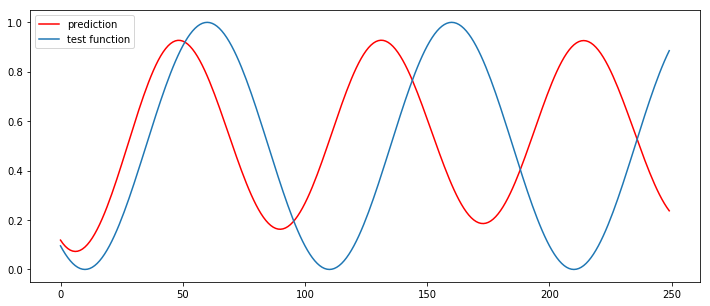

In [24]:
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])

plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label="prediction")
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label="test function")
plt.legend()
plt.show()